In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("ADANIPOWER_minute.csv")

In [3]:
df.columns=df.columns.str.capitalize()
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [4]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2015-02-02 09:15:00,52.50,52.70,52.40,52.60,142198
1,2015-02-02 09:16:00,52.50,52.65,52.35,52.45,106566
2,2015-02-02 09:17:00,52.40,52.50,52.25,52.40,140405
3,2015-02-02 09:18:00,52.35,52.40,52.05,52.20,103328
4,2015-02-02 09:19:00,52.20,52.25,52.15,52.20,75008


In [5]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927137 entries, 0 to 927136
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    927137 non-null  object 
 1   Open    927137 non-null  float64
 2   High    927137 non-null  float64
 3   Low     927137 non-null  float64
 4   Close   927137 non-null  float64
 5   Volume  927137 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 42.4+ MB


In [7]:
df["Date"]=pd.to_datetime(df['Date'],format='%Y-%m-%d %H:%M:%S')

In [8]:
df.sort_values("Date",inplace=True)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df=df[df["Volume"]>0]

In [11]:
#Resample to daily data

In [12]:
df1=df.set_index("Date").resample("D").agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()

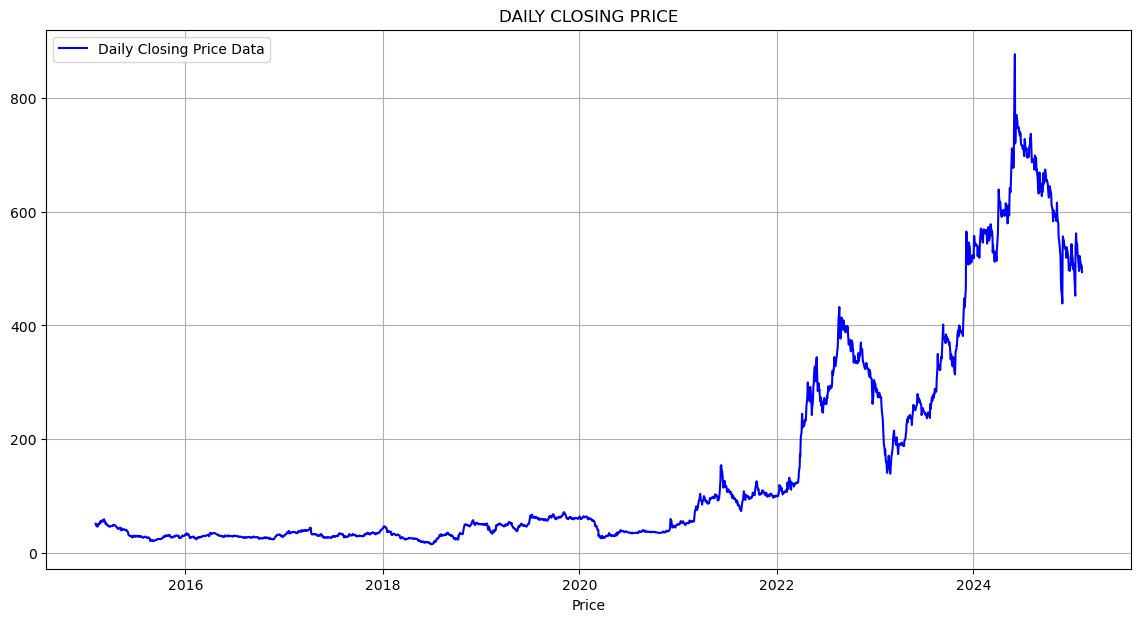

In [13]:
plt.figure(figsize=(14,7))
plt.plot(df1['Close'],label="Daily Closing Price Data",color="blue")
plt.title("DAILY CLOSING PRICE")
plt.xlabel("Date")
plt.xlabel("Price")
plt.legend()
plt.grid()
plt.show()

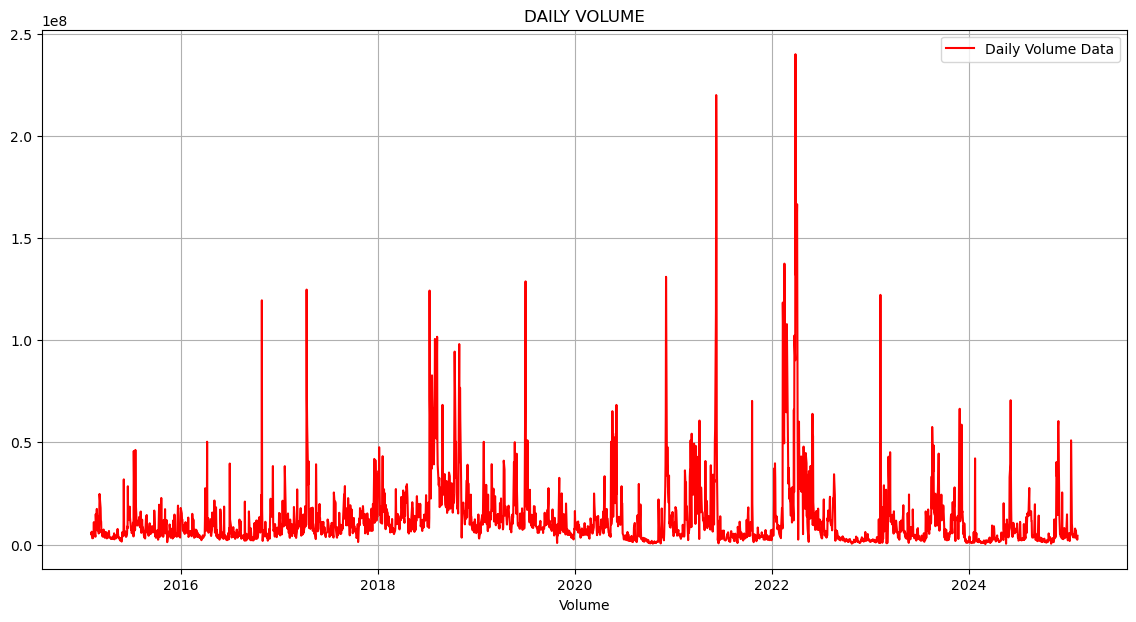

In [14]:
plt.figure(figsize=(14,7))
plt.plot(df1['Volume'],label="Daily Volume Data",color="red")
plt.title("DAILY VOLUME")
plt.xlabel("Date")
plt.xlabel("Volume")
plt.legend()
plt.grid()
plt.show()

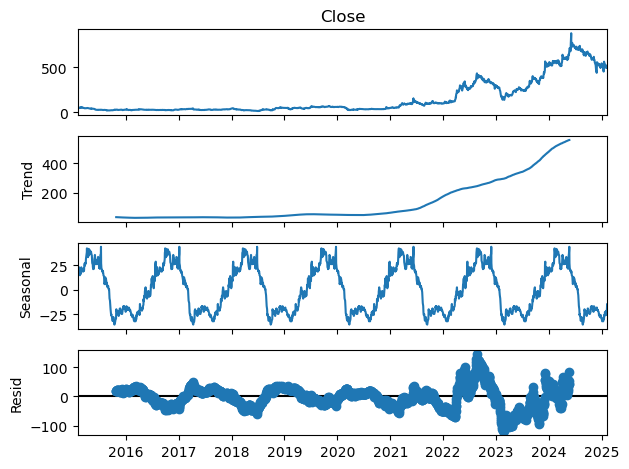

In [15]:
decompose_result=seasonal_decompose(df1['Close'],model="additive",period=365)
decompose_result.plot()
plt.show()

In [16]:
# Save cleaned and resampled data
df1.to_csv('ADANIPORTS_daily_cleaned.csv')

In [17]:
print("Data cleaned, resampled, and visualized. Saved as 'ADANIPORTS_daily_cleaned.csv'.")

Data cleaned, resampled, and visualized. Saved as 'ADANIPORTS_daily_cleaned.csv'.


In [18]:
from statsmodels.tsa.arima.model import ARIMA
arima_model=ARIMA(df1['Close'],order=(5,1,0))
arima_result=arima_model.fit()

ARIMA PRIDICTED PRICE WITH DATES
           Date  ARIMA_Pridicted_Price
2484 2025-02-08             493.055858
2485 2025-02-09             494.079360
2486 2025-02-10             494.698415
2487 2025-02-11             495.123897
2488 2025-02-12             494.624153
2489 2025-02-13             494.473591
2490 2025-02-14             494.491815
2491 2025-02-15             494.540738
2492 2025-02-16             494.592104
2493 2025-02-17             494.573868
2494 2025-02-18             494.559734
2495 2025-02-19             494.555895
2496 2025-02-20             494.557625
2497 2025-02-21             494.561904
2498 2025-02-22             494.561974
2499 2025-02-23             494.561154
2500 2025-02-24             494.560614
2501 2025-02-25             494.560528
2502 2025-02-26             494.560797
2503 2025-02-27             494.560883
2504 2025-02-28             494.560862
2505 2025-03-01             494.560820
2506 2025-03-02             494.560798
2507 2025-03-03             494

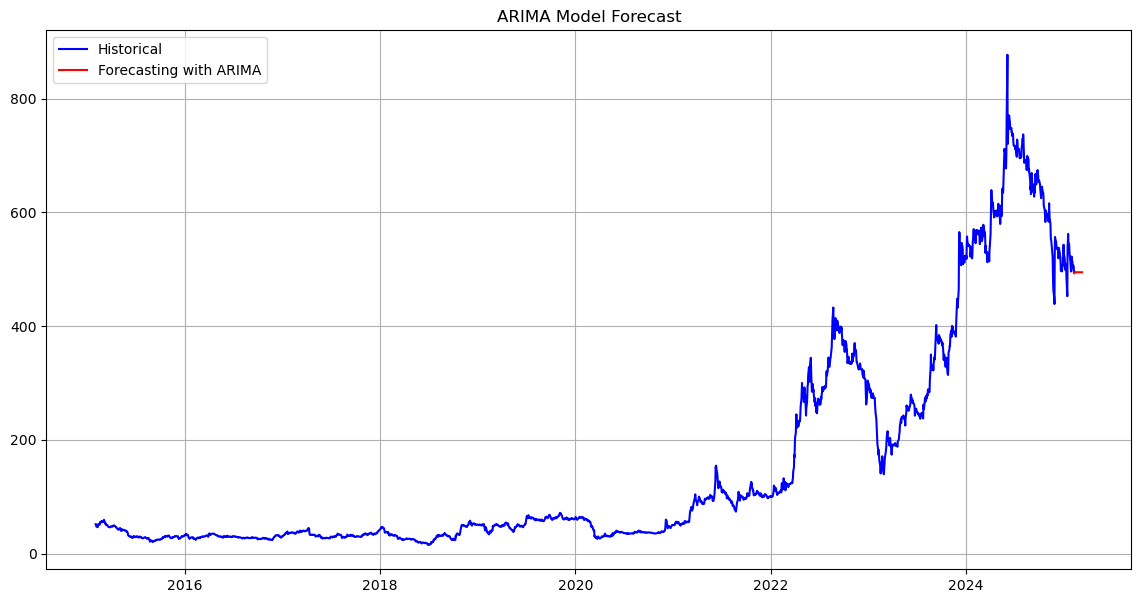

In [19]:
arima_forecast=arima_result.forecast(steps=30)
arima_dates=pd.date_range(df1.index[-1],periods=31,freq='D')[1:]
arima_pridictions=pd.DataFrame({'Date':arima_dates,"ARIMA_Pridicted_Price":arima_forecast})
print("ARIMA PRIDICTED PRICE WITH DATES")
print(arima_pridictions)

plt.figure(figsize=(14,7))
plt.plot(df1['Close'],label='Historical',color='blue')
plt.plot(arima_pridictions['Date'],arima_pridictions['ARIMA_Pridicted_Price'],label='Forecasting with ARIMA',color='red')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.grid()
plt.show()

In [20]:
#FORECAST WITH PROPHET

18:39:07 - cmdstanpy - INFO - Chain [1] start processing
18:39:10 - cmdstanpy - INFO - Chain [1] done processing


Prophet forecast with Dates
          Dates  Prophet_Pridicted_Price
2484 2025-02-08               701.521115
2485 2025-02-09               689.107740
2486 2025-02-10               685.311584
2487 2025-02-11               688.627936
2488 2025-02-12               689.064475
2489 2025-02-13               691.537238
2490 2025-02-14               693.040824
2491 2025-02-15               713.022499
2492 2025-02-16               700.829266
2493 2025-02-17               697.114746
2494 2025-02-18               700.373073
2495 2025-02-19               700.613988
2496 2025-02-20               702.758748
2497 2025-02-21               703.810186
2498 2025-02-22               723.226607
2499 2025-02-23               710.368574
2500 2025-02-24               705.905450
2501 2025-02-25               708.348903
2502 2025-02-26               707.727564
2503 2025-02-27               708.982479
2504 2025-02-28               709.136688
2505 2025-03-01               727.668642
2506 2025-03-02              

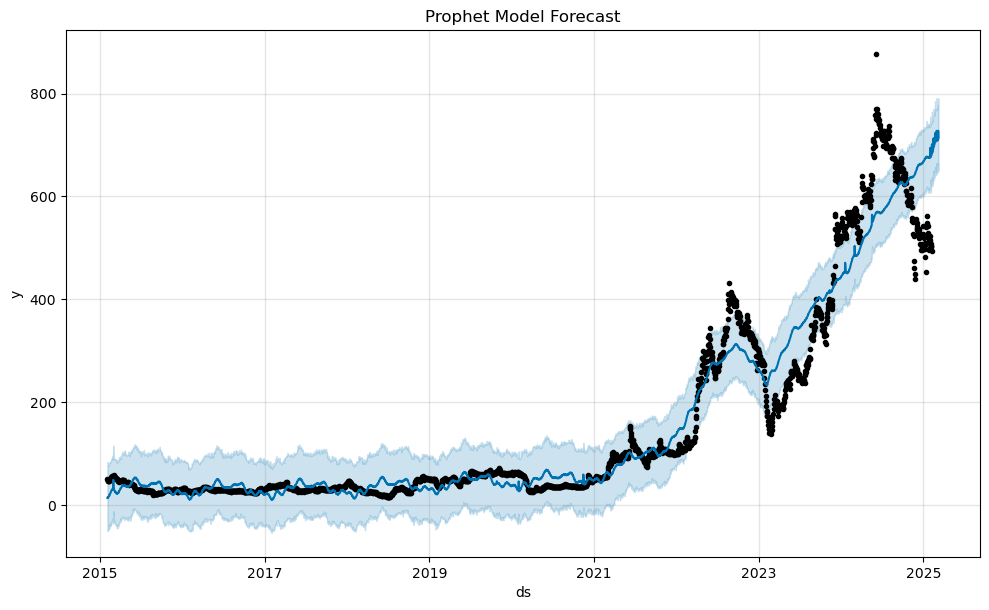

In [21]:
from prophet import Prophet
prophet_data=df1.reset_index()[['Date','Close']]
prophet_data.columns=['ds','y']
prophet_model=Prophet()
prophet_model.fit(prophet_data)

future_dates=prophet_model.make_future_dataframe(periods=30)
prophet_forecast=prophet_model.predict(future_dates)
prophet_pridictions=prophet_forecast[['ds','yhat']].tail(30)
prophet_pridictions.columns=['Dates','Prophet_Pridicted_Price']
print('Prophet forecast with Dates')
print(prophet_pridictions)

prophet_model.plot(prophet_forecast)
plt.title("Prophet Model Forecast")
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout


In [23]:
scaler_close=MinMaxScaler()
data_scaled=scaler_close.fit_transform(df1[['Close']].values)


In [24]:
sequence_length=60
x,y=[],[]
for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i,0])

x,y=np.array(x),np.array(y)

In [25]:
split=int(len(x)*0.8)
X_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]

In [26]:
lstm_model=Sequential([
    LSTM(100,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])),Dropout(0.3),
    LSTM(50,return_sequences=False),
    Dropout(0.3),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer="adam",loss="mean_squared_error")

In [27]:
lstm_model.fit(X_train,y_train,epochs=30,batch_size=32,verbose=1,validation_split=0.2)

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 157ms/step - loss: 3.6320e-04 - val_loss: 7.3283e-04
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 5.4423e-05 - val_loss: 9.4497e-04
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 4.7480e-05 - val_loss: 7.7998e-04
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 4.3960e-05 - val_loss: 4.4869e-04
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 3.2112e-05 - val_loss: 7.8520e-04
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 3.7119e-05 - val_loss: 5.5724e-04
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - loss: 4.1724e-05 - val_loss: 3.8056e-04
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 4.0087e-05 - val_loss: 3.8104e-04
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step - loss: 3.0897e-05 - val_loss: 3.3523e-04
Epoch 10/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - loss: 3.6659e-05 - val_loss: 3.6767e-04
Epoch 11/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - los

In [28]:
lstm_predictions=lstm_model.predict(x_test)
lstm_predictions=scaler_close.inverse_transform(lstm_predictions)
actual_prices=scaler_close.inverse_transform(y_test.reshape(-1,1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

rmse=np.sqrt(mean_squared_error(actual_prices,lstm_predictions))
mae=mean_absolute_error(actual_prices, lstm_predictions)
mape=np.mean(np.abs((actual_prices - lstm_predictions) / actual_prices))*100

print(f"LSTM Model RMSE: {rmse}")
print(f"LSTM Model MAE: {mae}")
print(f"LSTM Model MAPE: {mape}%")

LSTM Model RMSE: 30.38909350308761
LSTM Model MAE: 22.678548023971086
LSTM Model MAPE: 4.6019288762100725%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

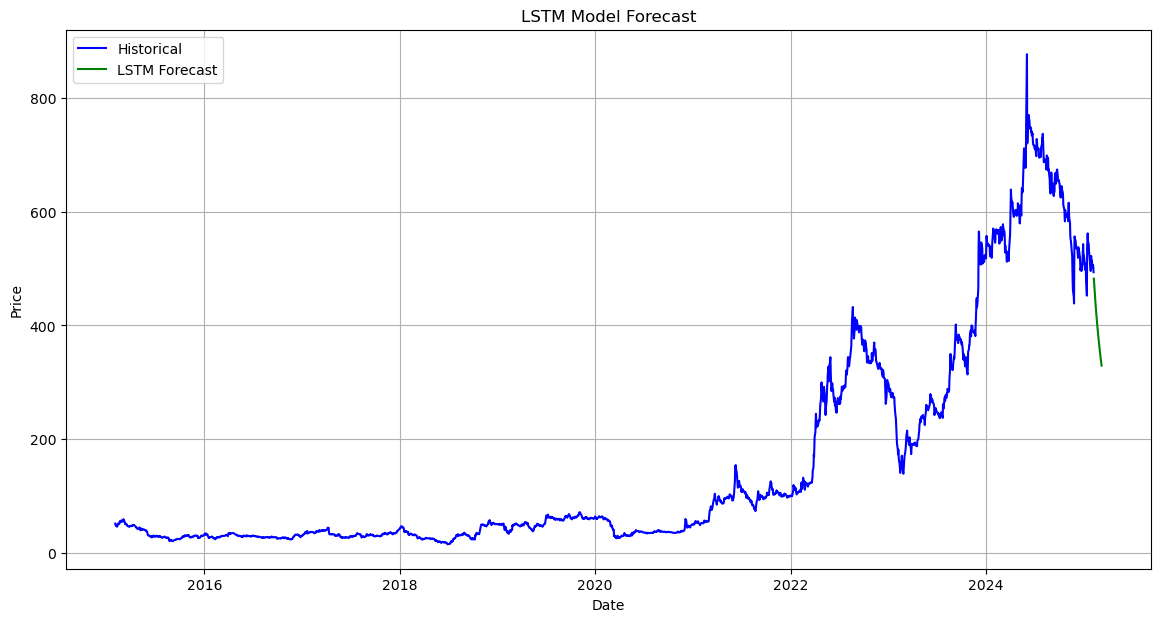

LSTM Forecast with Dates:
         Date  LSTM_Predicted_Price
0  2025-02-08            482.362732
1  2025-02-09            476.193512
2  2025-02-10            469.147614
3  2025-02-11            461.913300
4  2025-02-12            454.756927
5  2025-02-13            447.783875
6  2025-02-14            441.034180
7  2025-02-15            434.518677
8  2025-02-16            428.233795
9  2025-02-17            422.168610
10 2025-02-18            416.308807
11 2025-02-19            410.638885
12 2025-02-20            405.143433
13 2025-02-21            399.808075
14 2025-02-22            394.619812
15 2025-02-23            389.567139
16 2025-02-24            384.640259
17 2025-02-25            379.830627
18 2025-02-26            375.131165
19 2025-02-27            370.536011
20 2025-02-28            366.040100
21 2025-03-01            361.639099
22 2025-03-02            357.329437
23 2025-03-03            353.107880
24 2025-03-04            348.971588
25 2025-03-05            344.917908
26

In [30]:
last_sequence = data_scaled[-sequence_length:]
forecast = []
for _ in range(30):
    pred = lstm_model.predict(last_sequence.reshape(1, sequence_length, 1))
    forecast.append(pred[0, 0])
    last_sequence = np.append(last_sequence[1:], [[pred[0, 0]]], axis=0)

forecast = scaler_close.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()
lstm_dates = pd.date_range(df1.index[-1], periods=31, freq='D')[1:]
lstm_predictions_df = pd.DataFrame({'Date': lstm_dates, 'LSTM_Predicted_Price': forecast})

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(df1['Close'], label='Historical', color='blue')
plt.plot(lstm_predictions_df['Date'], lstm_predictions_df['LSTM_Predicted_Price'], label='LSTM Forecast', color='green')
plt.title('LSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

print("LSTM Forecast with Dates:")
print(lstm_predictions_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

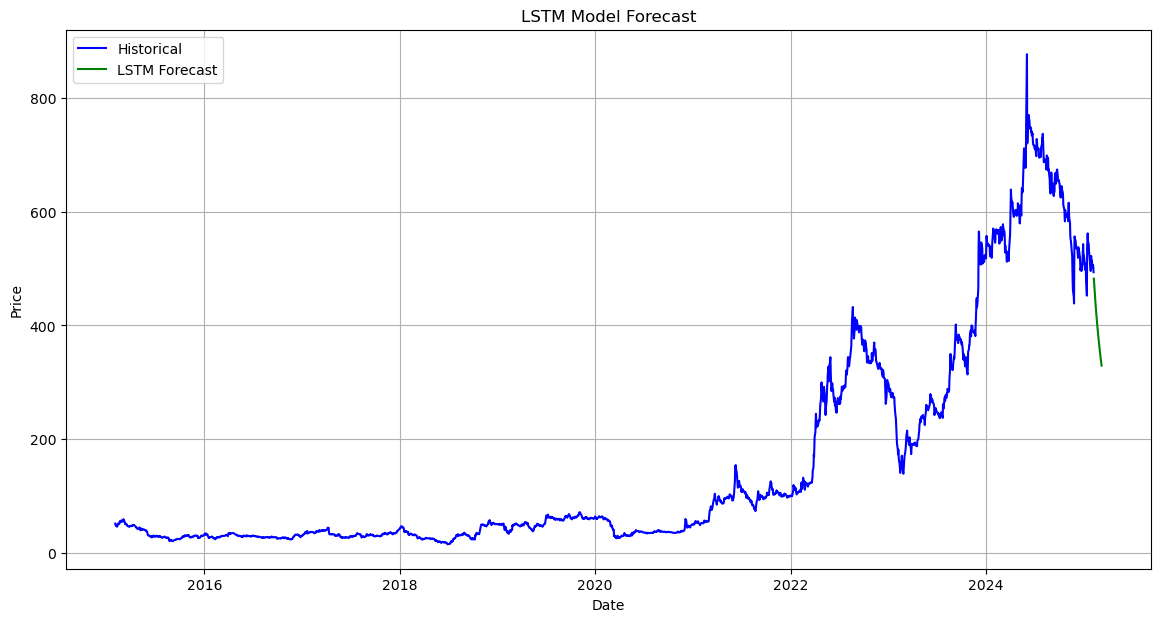

In [31]:
last_sequence=data_scaled[-sequence_length:]
forecast = []
for _ in range(30):
    pred=lstm_model.predict(last_sequence.reshape(1,sequence_length,1))
    forecast.append(pred[0,0])
    last_sequence=np.append(last_sequence[1:],[[pred[0,0]]],axis=0)

    
forecast=scaler_close.inverse_transform(np.array(forecast).reshape(-1,1)).flatten()
lstm_dates=pd.date_range(df1.index[-1],periods=31,freq="D")[1:]
lstm_predictions_df=pd.DataFrame({"Date":lstm_dates,"LSTM_Predicted_Price":forecast})


plt.figure(figsize=(14, 7))
plt.plot(df1['Close'], label='Historical', color='blue')
plt.plot(lstm_predictions_df['Date'], lstm_predictions_df['LSTM_Predicted_Price'], label='LSTM Forecast', color='green')
plt.title('LSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()